In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix ,precision_score
import seaborn as sb
pd.options.display.max_columns = None
sb.set()

In [2]:
#data loading
train = "C:\\Users\\Mega-PC\\Desktop\\projects\\titanic\\train.csv"
test= "C:\\Users\\Mega-PC\\Desktop\\projects\\titanic\\test.csv"
gender_submission= "C:\\Users\Mega-PC\\Desktop\\projects\\titanic\\gender_submission.csv"

train=pd.read_csv(train)
final_test= pd.read_csv(test)
outputlike= pd.read_csv(gender_submission)
##########################################################
train.dropna(subset= ["Survived"] ,axis = 0, inplace=True)
y= train.Survived
train.drop("Survived", axis=  1 , inplace=True)


# here are the cleaning data steps:

####  2 embarked nan --> change to most frequent embarked value

#### for age try imputer and drop the rows

#### thsoe with no cabinet value take letter H

# here are the imputer steps:

# feature engineering ideas:

#### -- sissb+parch = fammembers
 
#### -- from cabin choose only the letter ex: C152 --> C

#### -- Isworker to diff between workers and clients
 

# -------------------------DATA EXPLORATION--------------------------------

In [3]:
#outputlike.head()
print(train.shape)
print(train.dtypes)

(891, 11)
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


this section is for testing and exploring dataset

In [4]:
print(train.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [5]:
train[train.Age.isnull()].count()
#frequency of null values in age are too high (20.3%)
train.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print(list(train.Cabin[~train.Cabin.isnull()]))

['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'C23 C25 C27', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'D26', 'F E69', 'D47', 'C123', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'F2', 'B4', 'B80', 'G6', 'A31', 'D36', 'D15', 'C93', 'C83', 'C78', 'D35', 'G6', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106', 'B58 B60', 'E101', 'C22 C26', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'D', 'B18', 'C124', 'C91', 'C2', 'E40', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128', 'E33', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'D36', 'G6', 'C78', 'E10', 'C52', 'E44', 'B96 B98', 'C23 C25 C27', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'D', 'A14', 'B49', 'C93', 'B37', 'C30', 'D20', 'C22 C26', 'B79', 'C65', 'E25', 'D46', 'F33', 'B73', 'B18', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'E67', 'C101', 'E25', 'E44', 'C68', 'A10'

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <BarContainer object of 30 artists>)

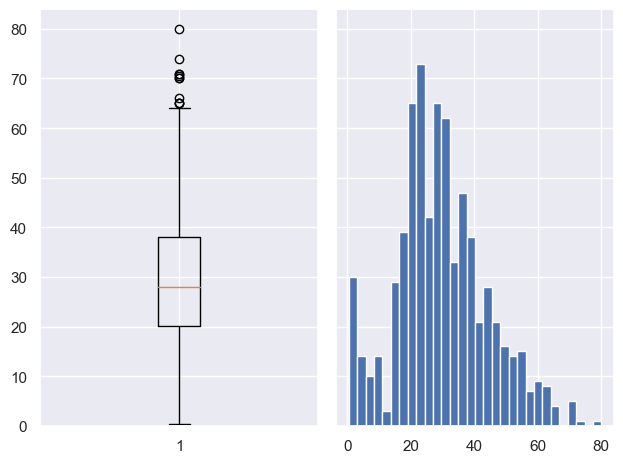

In [7]:
fig , axs = plt.subplots(1,2,sharey=True, tight_layout=True)
axs[0].boxplot(train.Age[~train.Age.isnull()])
axs[1].hist(train.Age[~train.Age.isnull()] , bins = 30)

In [8]:
train[train.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


# ---------------------------DATA CLEANING----------------------------------

In [9]:
train.Embarked.value_counts()
#S    644
#C    168
#Q     77
#Name: Embarked, dtype: int64
train.Embarked[train.Embarked.isnull()] = "S"

C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_1084\747959127.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Embarked[train.Embarked.isnull()] = "S"


In [10]:
train.Age[train.Age.isnull()]=train.Age.mean()

C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_1084\2014144774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Age[train.Age.isnull()]=train.Age.mean()


In [11]:
train.Cabin.fillna("H", inplace=True)

In [12]:
print(train.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [13]:
print(train.describe(include="all"))

        PassengerId      Pclass                     Name   Sex         Age  \
count    891.000000  891.000000                      891   891  891.000000   
unique          NaN         NaN                      891     2         NaN   
top             NaN         NaN  Braund, Mr. Owen Harris  male         NaN   
freq            NaN         NaN                        1   577         NaN   
mean     446.000000    2.308642                      NaN   NaN   29.699118   
std      257.353842    0.836071                      NaN   NaN   13.002015   
min        1.000000    1.000000                      NaN   NaN    0.420000   
25%      223.500000    2.000000                      NaN   NaN   22.000000   
50%      446.000000    3.000000                      NaN   NaN   29.699118   
75%      668.500000    3.000000                      NaN   NaN   35.000000   
max      891.000000    3.000000                      NaN   NaN   80.000000   

             SibSp       Parch  Ticket        Fare Cabin Embark

In [14]:
print(train.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# ------------------------FEATURE ENGINEERING-----------------------------

#### ppl paying 0.00 fare are most likely workers on the boat , we can make a enw variable to distinguish between workers and clients, would be a bool variable

In [15]:
train["Isworker"]= train.Fare == 0.0

#### we add a Fammem variable that sums up to the total of family members on board (Fammem = SibSp + ParCh)

In [16]:
train["Fammem"] = train.SibSp + train.Parch

#### Cabin class variable

In [17]:
train["Cc"] = train.Cabin.str[0]

# ----------------------------------MODELING---------------------------------

In [23]:
training_data = train.drop(['PassengerId', 'Name', 'SibSp', 'Parch','Ticket', 'Cabin'] , axis = 1)
X_train , X_test , y_train , y_test = train_test_split(training_data , y , test_size = 0.2 , random_state= 5)
print(training_data.columns)
training_data.head()

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Isworker', 'Fammem', 'Cc'], dtype='object')


,Pclass,Sex,Age,Fare,Embarked,Isworker,Fammem,Cc
0,3,male,22.0,7.2500,S,False,1,H
1,1,female,38.0,71.2833,C,False,1,C
2,3,female,26.0,7.9250,S,False,0,H
3,1,female,35.0,53.1000,S,False,1,C
4,3,male,35.0,8.0500,S,False,0,H


Ordinal and OH encoder in pipeline

In [ ]:
ord_cols = ["Sex" , "Isworker"]
OH_cols = ["Embarked" , "Cc"]
ord_encoder = OrdinalEncoder()
OH_encoder = OneHotEncoder(handle_unknown="error" , sparse = False)

preprocessor = ColumnTransformer(transformers=[
    ("ord" , ord_encoder , ord_cols),
    ("OH" , OH_encoder , OH_cols)])
preprocessor


ColumnTransformer(transformers=[('ord', OrdinalEncoder(), ['Sex', 'Isworker']),
                                ('OH', OneHotEncoder(sparse=False),
                                 ['Embarked', 'Cc'])])

In [ ]:
def modelscore(X):
    my_pipeline = Pipeline(steps = [
    ("preprocessor" ,preprocessor),
    ("model" , X)
    ])
    my_pipeline.fit(X_train , y_train)
    preds = my_pipeline.predict(X_test)
    dict={ "Confusion matrix" : confusion_matrix(y_test , preds) ,"precision score" : precision_score(y_test , preds), "accuracy_score" : accuracy_score(y_test, preds)}
    return dict


In [ ]:
modelLR = LogisticRegressionCV()
modelRF = RandomForestClassifier()
modelXGB= XGBClassifier()
modelDT = DecisionTreeClassifier()

RFscore = modelscore(modelRF)
XGBscore = modelscore(modelXGB)
DTscore = modelscore(modelDT)
LRscore = modelscore(modelLR)


scores = pd.DataFrame([RFscore , DTscore , XGBscore , LRscore] , index=["RF","DT", "XGB", "LR"])
scores

,Confusion matrix,precision score,accuracy_score
RF,"[[94, 17], [21, 47]]",0.734375,0.787709
DT,"[[96, 15], [21, 47]]",0.758065,0.798883
XGB,"[[95, 16], [20, 48]]",0.750000,0.798883
LR,"[[97, 14], [23, 45]]",0.762712,0.793296
